# Data Visualization
* In this lab, we will cover Data Visualization techniques using famous library known as Matplotlib
* Data visualizaiton is essential steps when you want to communicate your findings with your your stakeholders or any other interested parties
* Apart from matplotlib, there are several other Data visualizaton tools/technologies available. However learning matplotlib
  will make your path easier in learning other visualizations tools as well.
* Matplotlib is a widely-used Python library fro creating static, interactive and animated visualizations. It provides a flexible and easy-to-use interfacefor generating various types of plots, charts and graphs.
* Plotting in pandas:
  * Pandas also has built-in implementation via plot()
    * df.plot()
    * Series.plot()
* We will cover:
  * Scatter plot
  * Line plot
  * Bar plot
  * Pie chart
  * Area Chart
  * Violin plot
  * Heatmap
  * Bubble Plot

# Questions that will be answered by data are? 

1. `How does the average satisfaction level change with increasing years of employment?`
2. `How many employees have spent a specific number of years (time spent in the company)?`
3. `What is the distribution of satisfaction levels among employees?`
4. `What is the distribution of work accidents among departments?`
5. `What is the distribution of promotions based on departments?`
6. `How does employee satisfaction vary across different departments?`
7. `Figure out employee leaving status (time_spend vs satisfaction_level vs left?`
8. `How are the numerical variables correlated with each other?`
9. `How to create different scatter plots under single matplotlib figure?`

In [1]:
# importing pandas and matplotlib and reading csv file using pandas

import matplotlib.pyplot as plt
import pandas as pd
hr_df = pd.read_csv("data/hr_comma_sep.csv")

In [2]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# How does the average satisfaction level change with increasing years of employment?

* Calculating average satisfaction with increasing years of employment

In [74]:
# average satisfaction level with increasing years of employment
level = hr_df.groupby(["time_spend_company"]).satisfaction_level.mean()
level

time_spend_company
2     0.697078
3     0.626314
4     0.467517
5     0.610305
6     0.603440
7     0.635957
8     0.665062
10    0.655327
Name: satisfaction_level, dtype: float64

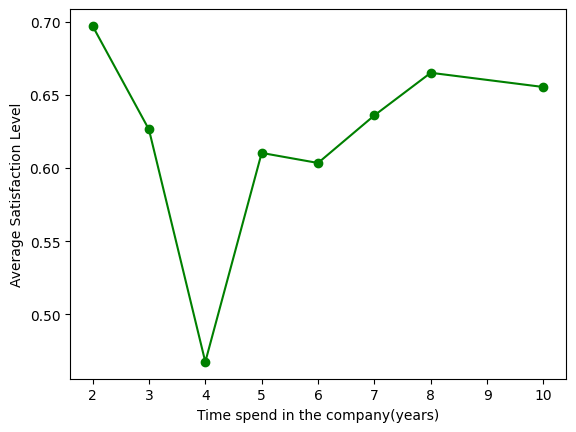

In [5]:
# collection of time in years
time = level.index

# collection of average satisfaction
avg_satis = level.values

# plotting line using matplotlib.pyplot.plot
plt.plot(time, avg_satis, "o-", color="green")

# labeling x and y
plt.xlabel("Time spend in the company(years)")
plt.ylabel("Average Satisfaction Level")

plt.show()

* Above line plot shows that average satisfaction level employees  who spend 4 years in the company is less which is almost below 0.5.
* Whereas the employees who spend 2 years in the company has high satisfaction level that is nearly 0.7.

In [6]:
# hr_df.time_spend_company.unique()

In [7]:
# time_spend = hr_df.time_spend_company.unique()
# time_spend = sorted(list(time_spend))
# time_spend

In [8]:
# mean_satis_level = []
# for item in time_spend:
#     mean = hr_df[hr_df["time_spend_company"] == item].satisfaction_level.mean()
#     mean_satis_level.append(round(mean, 2))
# mean_satis_level

# How many employees have spent a specific number of years (time spent in the company)?

### counting the no. of employees who have spent the time in the company ###

In [9]:
to_count = hr_df.groupby(["time_spend_company"]).time_spend_company.value_counts()
to_count

time_spend_company
2     3244
3     6443
4     2557
5     1473
6      718
7      188
8      162
10     214
Name: count, dtype: int64

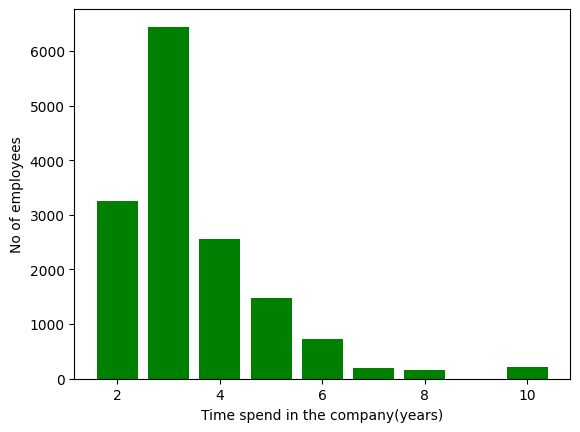

In [10]:
# array of time spending of an employee in a company
time_spend = to_count.index

count = to_count.values

plt.bar(x=time_spend, height=count, color="green")

plt.xlabel("Time spend in the company(years)")
plt.ylabel("No of employees")

plt.show()

* Above barchart shows that the number of employees who spend 3 years in the company are highest follows by employees who spend 2 years and 4 years.
* There are least number of employees who spend 8 years in the company follows by 7 years and 10 years.

# What is the distribution of satisfaction levels among employees?

In [11]:
hr_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


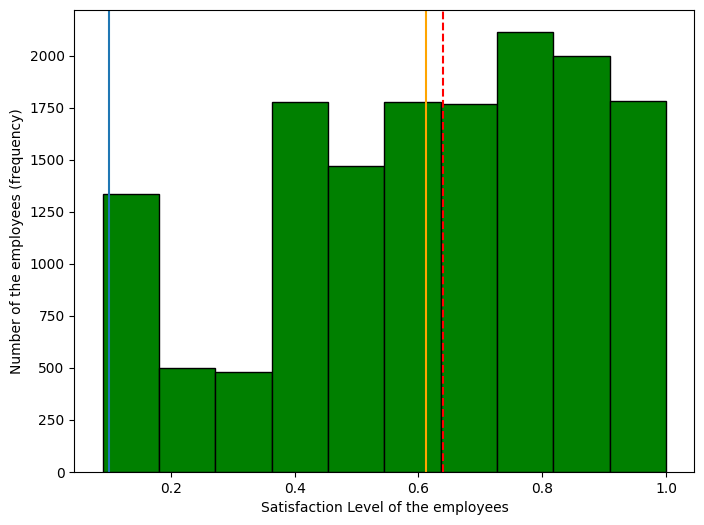

In [89]:
mean = hr_df["satisfaction_level"].mean()
median = hr_df["satisfaction_level"].median()
mode = hr_df["satisfaction_level"].mode()


plt.figure(figsize=(8, 6))
plt.hist(hr_df["satisfaction_level"],  color="green", edgecolor="black")
plt.axvline(mean, color="orange")
plt.axvline(median, color="red", linestyle="--")
plt.axvline(mode[0])
plt.xlabel("Satisfaction Level of the employees")
plt.ylabel("Number of the employees (frequency)")
plt.show()

* Above histogram plot shows it is left skewed which can also be concluded from mean and median because  median is greater than mean.
* In the above figure we can see that most of the employees are satisfied with their job as their satisfaciton level is lies between 0.4 to 1.

# What is the distribution of work accidents among departments?

In [16]:
data = hr_df.groupby(["Department"]).Work_accident.sum()
data

Department
IT             164
RandD          134
accounting      96
hr              89
management     103
marketing      138
product_mng    132
sales          587
support        345
technical      381
Name: Work_accident, dtype: int64

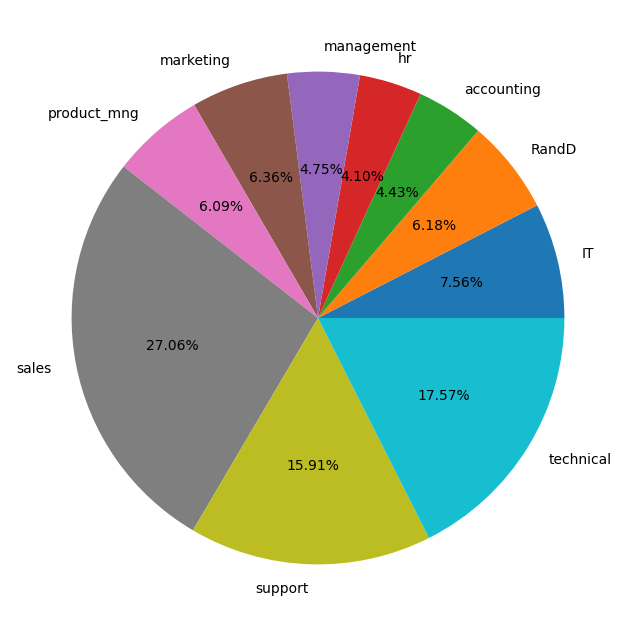

In [17]:
plt.figure(figsize=(11, 8))
plt.pie(data.values, labels=data.index, autopct="%.2f%%")
plt.show()

* Above piechart shows that highest number of work accident occurs in the department of Sales followed by the technical department and support.
* Least number of accident occurs in the hr department followed by accounting and management department.

# What is the distribution of promotions based on departments?

In [69]:
data = hr_df.groupby(["Department", "promotion_last_5years"]).promotion_last_5years.count().unstack()
data

promotion_last_5years,0,1
Department,,
IT,1224.0,3.0
RandD,760.0,27.0
accounting,753.0,14.0
hr,724.0,15.0
management,561.0,69.0
marketing,815.0,43.0
product_mng,902.0,NaN
sales,4040.0,100.0
support,2209.0,20.0


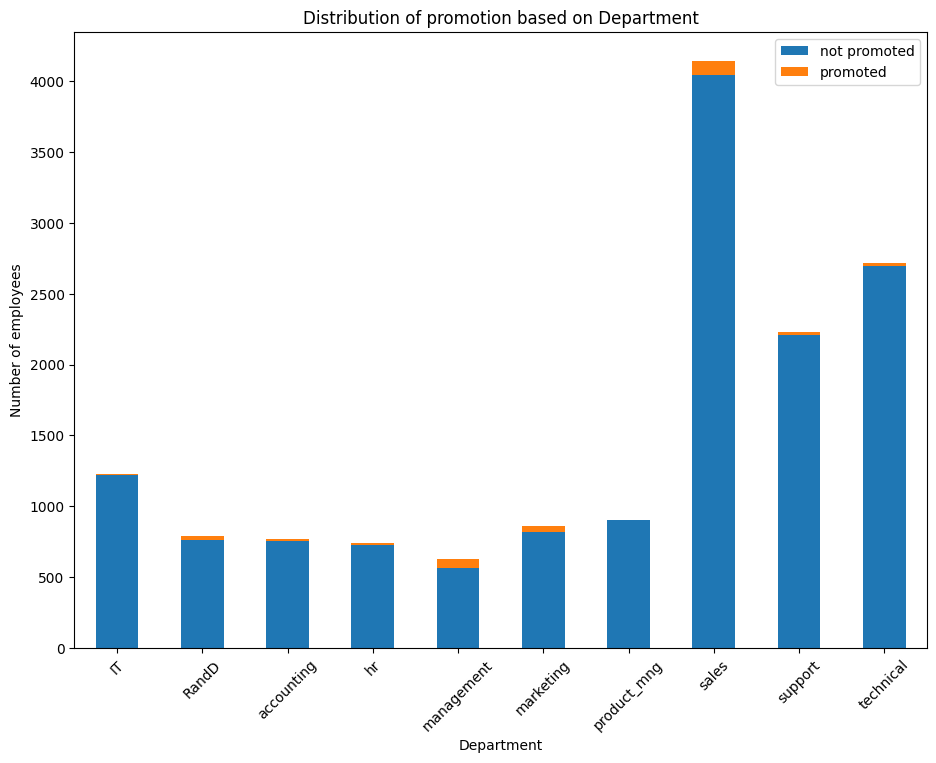

In [73]:
data.plot(kind="bar",stacked=True, figsize=[11, 8])
plt.title("Distribution of promotion based on Department")
plt.legend(labels=["not promoted", "promoted"])
plt.ylabel("Number of employees")
plt.xticks(rotation=45)
plt.show()

* Above barchart indicates that the sales department has the highest number of promotions as well as the highest number of employees who were not promoted.
* No one in the product mng department are promoted in the last five years.

# How does employee satisfaction vary across different departments?

In [91]:
data = hr_df.groupby(["Department"]).satisfaction_level.value_counts()
data

Department  satisfaction_level
IT          0.11                  35
            0.10                  34
            0.87                  32
            0.74                  26
            0.66                  25
                                  ..
technical   0.35                   5
            0.26                   5
            0.29                   5
            0.28                   4
            0.47                   3
Name: count, Length: 900, dtype: int64

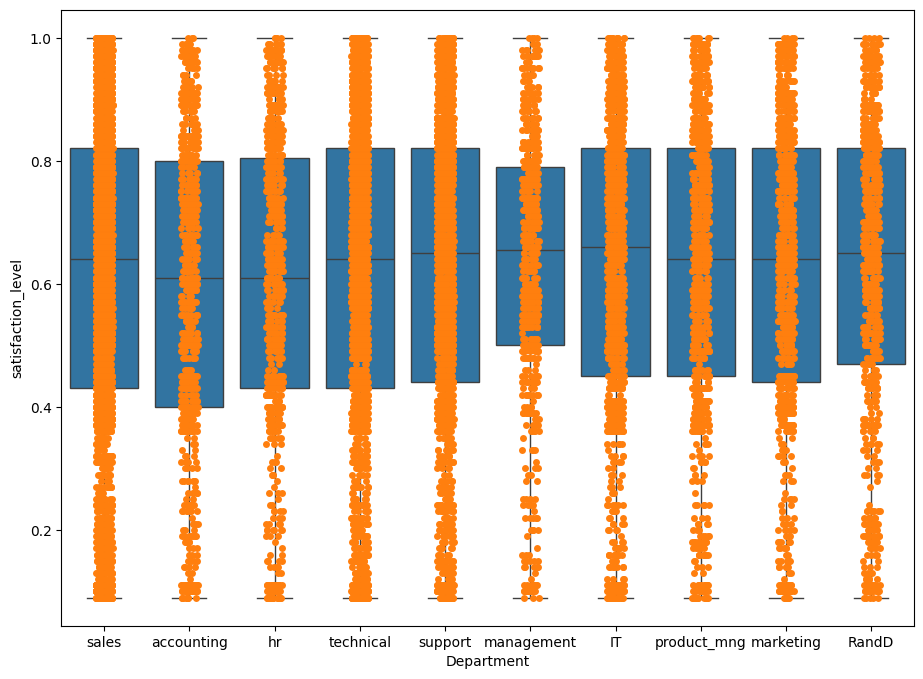

In [93]:
import seaborn as sns
plt.figure(figsize=(11, 8))
sns.boxplot(x="Department", y="satisfaction_level", data=hr_df)
sns.stripplot(x="Department", y="satisfaction_level", data=hr_df)
plt.show()

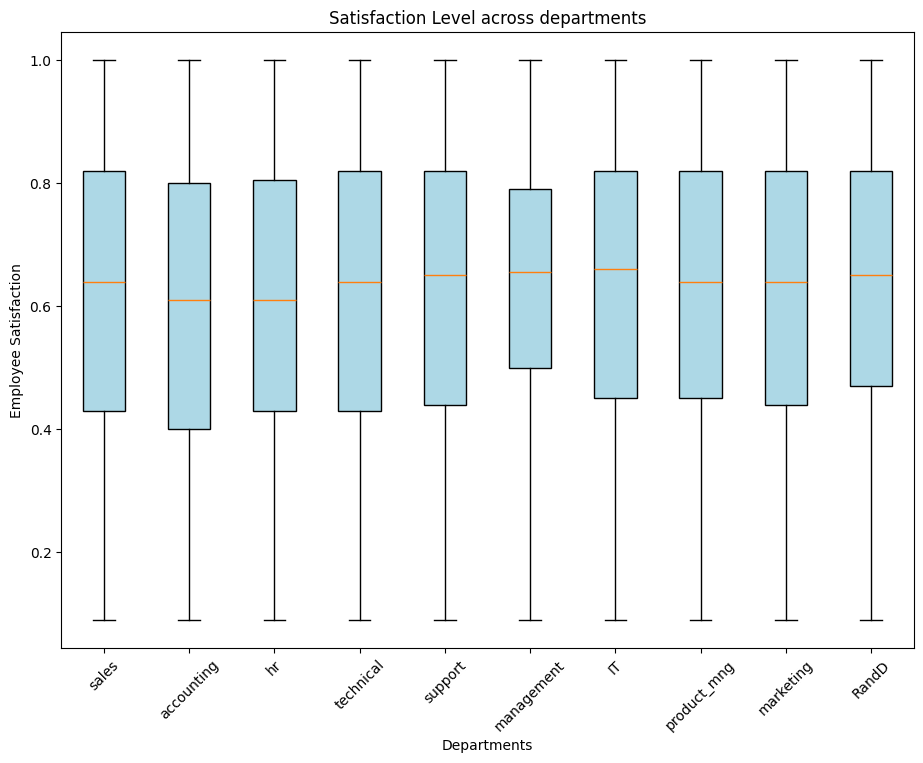

In [94]:
department = hr_df["Department"].unique()
plt.figure(figsize=(11, 8))
plt.boxplot([hr_df[hr_df["Department"]==dept]["satisfaction_level"] for dept in department], 
            labels=department, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.xlabel("Departments")
plt.ylabel("Employee Satisfaction")
plt.title("Satisfaction Level across departments")

plt.xticks(rotation=45)
plt.show()

# Figure out employee leaving status (time_spend vs satisfaction_level vs left?

In [95]:
hr_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [103]:
hr_df.groupby(["left", "time_spend_company"]).time_spend_company.value_counts().unstack()

time_spend_company,2,3,4,5,6,7,8,10
left,,,,,,,,
0,3191.0,4857.0,1667.0,640.0,509.0,188.0,162.0,214.0
1,53.0,1586.0,890.0,833.0,209.0,NaN,NaN,NaN


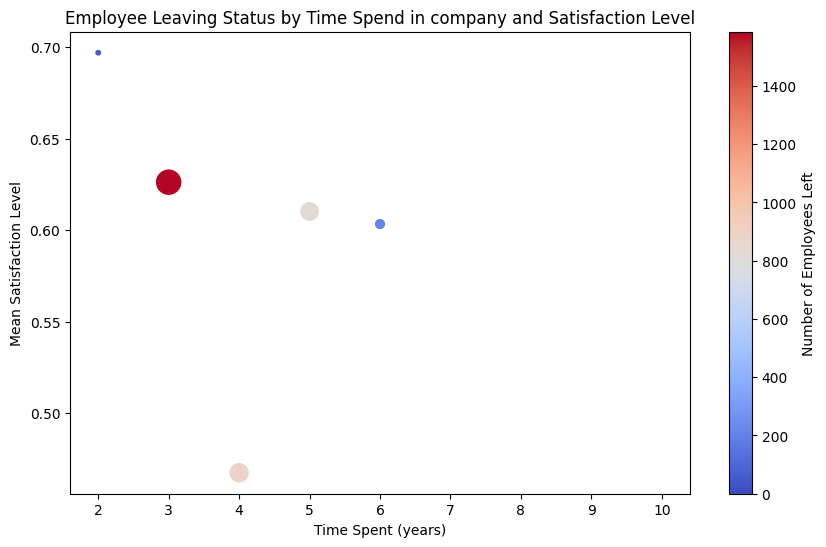

In [130]:
stats_time = hr_df.groupby(["time_spend_company"]).agg({"satisfaction_level": "mean", "left": "sum"}).reset_index()
stats_time
x_data = stats_time["time_spend_company"]
y_data= stats_time["satisfaction_level"]
z_data = stats_time["left"]
z_weights = (z_data + z_data.min()) / (z_data.max() - z_data.min())
z_weights

# Plot figure size 
plt.figure(figsize=(10, 6))

# Plot bubble plot
plt.scatter(x_data, y_data, s=z_weights * 300, c=z_data, cmap='coolwarm')

# Set labels and title
plt.xlabel('Time Spent (years)')
plt.ylabel('Mean Satisfaction Level')
plt.title('Leaving department of employees by Time Spend in company and Satisfaction Level')
plt.colorbar(label='Number of Employees Left')

plt.show()




# How are the numerical variables correlated with each other?

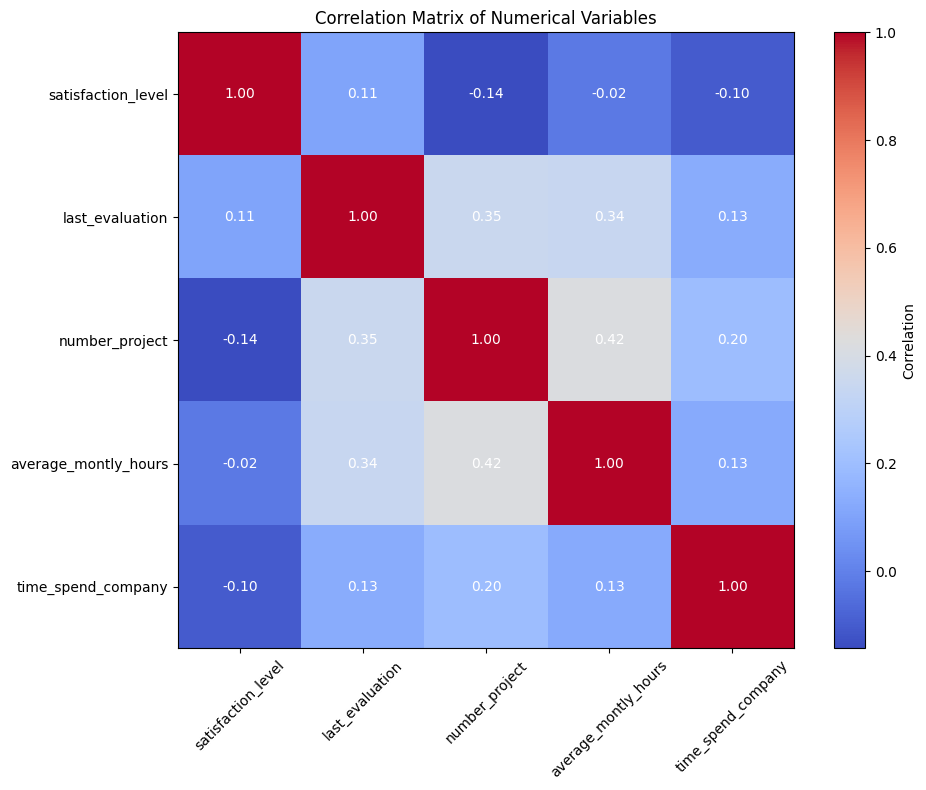

In [143]:
numerical_data = hr_df[['satisfaction_level', 'last_evaluation', 'number_project', 
                       'average_montly_hours', 'time_spend_company']]
# Calculate correlation matrix
correlation_matrix = numerical_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='white')

plt.colorbar(label='Correlation')
plt.title('Correlation Matrix of Numerical Variables')
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()

plt.show()


* Above heatmap shows that no any data are highly correlated with each other.
* The diagonal shows the correlation of data with self is 1 such correlation of satisfaction_level with satisfaction_level is 1.

# How to create different scatter plots under single matplotlib figure?

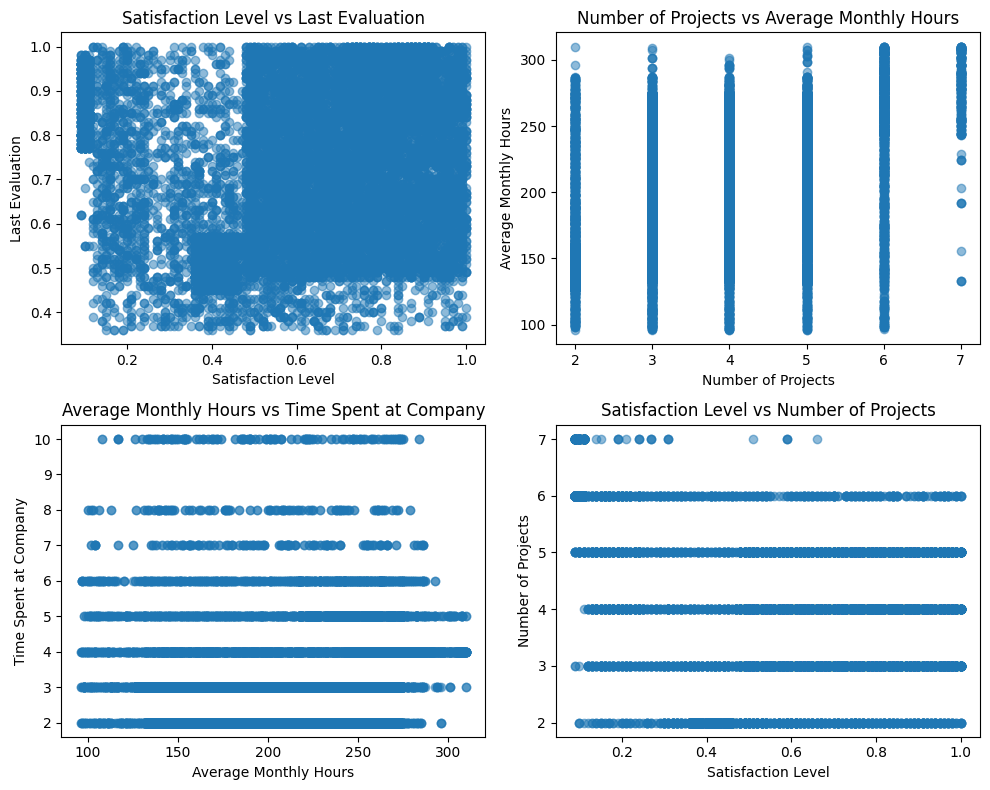

In [173]:
plt.figure(figsize=(10, 8))

# Scatter plot 1
plt.subplot(2, 2, 1)
plt.scatter(hr_df["satisfaction_level"], hr_df["last_evaluation"], alpha=0.5)
plt.title('Satisfaction Level vs Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')

# Scatter plot 2
plt.subplot(2, 2, 2)
plt.scatter(hr_df["number_project"], hr_df["average_montly_hours"], alpha=0.5)
plt.title('Number of Projects vs Average Monthly Hours')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')

# Scatter plot 3
plt.subplot(2, 2, 3)
plt.scatter(hr_df["average_montly_hours"], hr_df["time_spend_company"], alpha=0.5)
plt.title('Average Monthly Hours vs Time Spent at Company')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Time Spent at Company')

# Scatter plot 4
plt.subplot(2, 2, 4)
plt.scatter(hr_df["satisfaction_level"], hr_df["number_project"], alpha=0.5)
plt.title('Satisfaction Level vs Number of Projects')
plt.xlabel('Satisfaction Level')
plt.ylabel('Number of Projects')

plt.tight_layout()
plt.show()


* Above figure shows how different scatter plot can be plot under same matplotlib figure.
* The above subplot contains 2 rows and 2 columns which contains the total of 4 scatter plot.
* First plot shows the scatterplot between satisfaction_level vs last_evaluation, second shows the scatterplot between no. of projects vs average monthly hours.